In [11]:
from keras.models import Sequential
from keras.layers import Cropping2D, Lambda, Dropout, ELU
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


def build_model(og_img_shape):

    model = Sequential()

    model.add(Lambda(lambda x: x / 127.5 - 1.0, input_shape = og_img_shape))

    model.add(Conv2D(24, (5,5), strides=(2, 2), padding='same', activation='elu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='valid'))

    model.add(Conv2D(36, (5,5), strides=(2, 2), padding='same', activation='elu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='valid'))

    model.add(Conv2D(48, (5,5), strides=(2, 2), padding='same', activation='elu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='valid'))

    model.add(Conv2D(64, (3,3), strides=(1, 1), padding='valid', activation='elu'))

    model.add(Conv2D(64, (3,3), strides=(1, 1), padding='valid', activation='elu'))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(100, activation = 'elu'))
    model.add(Dense(50, activation = 'elu'))
    model.add(Dense(10, activation = 'elu'))
    model.add(Dense(1))

    model.summary()

    return model

In [3]:
import numpy as np

In [4]:
a = np.load('/Users/saurabh7/Downloads/123.npz')

In [14]:
train = a['a']

In [15]:
labels = a['b']

In [12]:
train

(1550, 480, 640, 3)

In [10]:
labels

(1550, 1)

In [5]:
import matplotlib.pyplot as plt
import cv2

In [16]:
img = cv2.imread('racetrack.jpg')

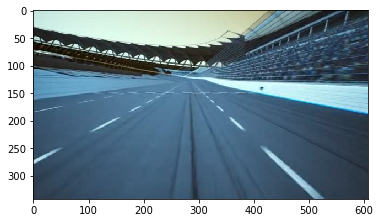

In [15]:
plt.imshow(cv2.imread('racetrack.jpg'))

In [17]:
img.shape

(342, 608, 3)

In [19]:
model = build_model((train.shape[1], train.shape[2], train.shape[3]))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_2 (Lambda)            (None, 480, 640, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 240, 320, 24)      1824      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 120, 160, 24)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 60, 80, 36)        21636     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 40, 36)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 20, 48)        43248     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 10, 48)        

In [30]:
import numpy as np
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(train, labels, test_size=0.2, random_state=42)

In [26]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [32]:
model.fit(X_train,y_train,validation_data=[X_test, y_test], epochs=3)

Train on 1240 samples, validate on 310 samples
Epoch 1/3
1240/1240 [==============================] - 58s 47ms/step - loss: 0.0101 - val_loss: 0.0097
Epoch 2/3
1240/1240 [==============================] - 49s 39ms/step - loss: 0.0105 - val_loss: 0.0105
Epoch 3/3
1240/1240 [==============================] - 47s 38ms/step - loss: 0.0097 - val_loss: 0.0094


In [35]:
import matplotlib.pyplot as plt

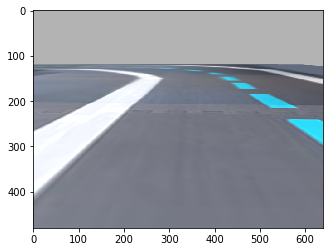

In [59]:
plt.imshow(X_train[2,:,:,:])

In [63]:
y_train[y_train<-0.1]

array([-0.16      , -0.23999999, -0.16      , -0.31999999, -0.72000003,
       -0.72000003, -0.16      , -0.16      , -0.16      , -0.23999999,
       -0.16      , -0.16      , -0.16      , -0.23999999, -0.16      ,
       -0.16      , -0.47999999, -0.16      , -0.16      , -0.16      ,
       -0.16      , -0.56      , -0.16      , -0.16      , -0.16      ,
       -0.16      , -0.40000001, -0.16      , -0.40000001, -0.16      ,
       -0.16      ])

In [47]:
model.predict(X_train[1,:,:,:].reshape(-1, train.shape[1], train.shape[2], train.shape[3] ))

array([[0.1813775]], dtype=float32)

In [64]:
model.save('my_model.h5')

In [30]:
img.reshape(1, 342, 608, 3)

array([[[[195, 228, 221],
         [195, 228, 221],
         [195, 228, 221],
         ...,
         [ 29,  33,  27],
         [ 27,  34,  27],
         [ 28,  35,  28]],

        [[195, 228, 221],
         [195, 228, 221],
         [195, 228, 221],
         ...,
         [ 30,  34,  28],
         [ 28,  35,  28],
         [ 28,  35,  28]],

        [[195, 228, 221],
         [195, 228, 221],
         [195, 228, 221],
         ...,
         [ 29,  35,  30],
         [ 30,  36,  31],
         [ 30,  36,  31]],

        ...,

        [[ 46,  62,  79],
         [ 46,  62,  79],
         [ 46,  62,  79],
         ...,
         [ 41,  50,  63],
         [ 41,  50,  63],
         [ 41,  50,  63]],

        [[ 46,  62,  79],
         [ 46,  62,  79],
         [ 46,  62,  79],
         ...,
         [ 41,  50,  63],
         [ 41,  50,  63],
         [ 41,  50,  63]],

        [[ 45,  61,  78],
         [ 45,  61,  78],
         [ 45,  61,  78],
         ...,
         [ 41,  50,  63],
        